 # Binary Classification Explained

In [ ]:
!pip install -r requirements.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


# Generate synthetic data
np.random.seed(42)
X_regression = np.linspace(-10, 10, 200).reshape(-1, 1)
y_regression = 1 / (1 + np.exp(-0.5 * X_regression)).ravel() + 0.1 * np.random.randn(X_regression.shape[0])

X_classification, y_classification = make_classification(
    n_samples=200, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42
)

In [2]:
model = LogisticRegression()
model.fit(X_classification, y_classification)

y_prob = model.predict_proba(X_classification)[:, 1]
threshold = 0.6
decision_boundary = (np.log(threshold / (1 - threshold)) - model.intercept_) / model.coef_

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

def plot_logistic_regression_results(model, X_regression, y_regression, X_classification, y_classification, threshold=0.5):

    if not isinstance(model, BaseEstimator):
        raise TypeError("The provided model must be an instance of sklearn's BaseEstimator.")
    
    if not hasattr(model, "predict_proba"):
        raise ValueError("The provided model must implement `predict_proba`.")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].scatter(X_regression, y_regression, alpha=0.6, label="Regression Data")
    X_range = np.linspace(X_regression.min(), X_regression.max(), 200).reshape(-1, 1)
    ideal_sigmoid = 1 / (1 + np.exp(-0.5 * X_range))
    axes[0].plot(X_range, ideal_sigmoid, color='red', label="Logistic Curve (Ideal)")
    axes[0].axhline(y=threshold, color='green', linestyle='--', label=f"Decision Threshold (Y={threshold})")
    axes[0].set_title("Logistic Regression as Regression")
    axes[0].set_xlabel("Feature (X)")
    axes[0].set_ylabel("Target (y)")
    axes[0].legend()

    y_sigmoid = model.predict_proba(X_range)[:, 1]
    axes[1].scatter(X_classification, y_classification, alpha=0.6, label="Data (0 or 1)")
    axes[1].plot(X_range, y_sigmoid, color='red', label="Logistic Curve (Sigmoid)")
    axes[1].axhline(y=threshold, color='green', linestyle='--', label=f"Decision Threshold (Y={threshold})")
    axes[1].set_title("Logistic Regression as Classification")
    axes[1].set_xlabel("Feature (X)")
    axes[1].set_ylabel("Predicted Probability (P(y=1))")
    axes[1].legend()
    plt.tight_layout()
    plt.show()

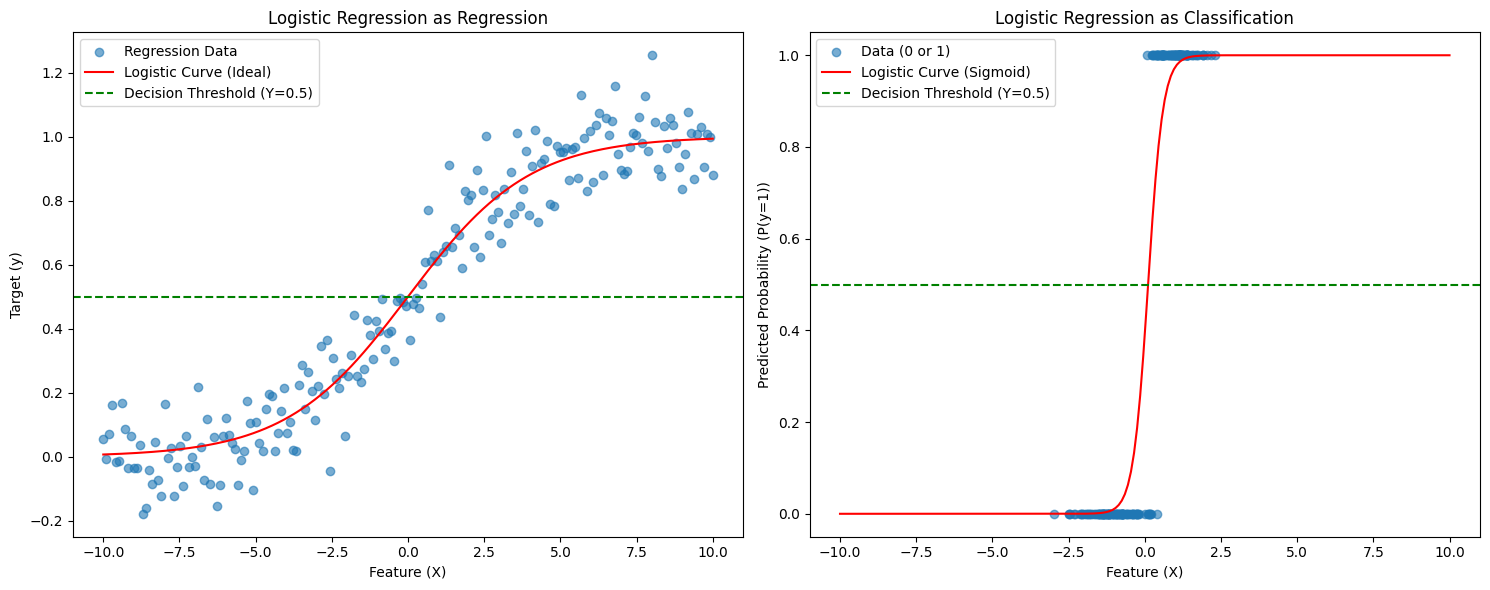

In [4]:
# Plot the results
plot_logistic_regression_results(model, X_regression, y_regression, X_classification, y_classification, threshold=0.5)